# Einleitung

Dieses Notebook soll zeigen wie einfach Machine Learning ist!

Wir werden versuchen den Verkaufspreis eines Autos vorherzusagen und auch überprüfen wie gut unsere Modelle dies für Testautos können!

# Verwendeter Datensatz

- Name: "Germany Cars Dataset"    
- URL: https://www.kaggle.com/datasets/ander289386/cars-germany
- Lizenz: Public Domain
- Größe: 510 KB
- Umfang: 9 Merkmale für 46405 Fahrzeuge

# Daten einlesen

In [1]:
import pandas
t = pandas.read_csv("autoscout24-germany-dataset.csv")

In [2]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


# Daten bereinigen

## Daten auf Vollständigkeit und Plausibilität überprüfen

In [3]:
t.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [4]:
pandas.options.display.float_format = '{:.5f}'.format
t.describe()

,mileage,price,hp,year
count,46405.00000,46405.00000,46376.00000,46405.00000
mean,71177.86411,16572.33723,132.99099,2016.01295
std,62625.30846,19304.69592,75.44928,3.15521
min,0.00000,1100.00000,1.00000,2011.00000
25%,19800.00000,7490.00000,86.00000,2013.00000
50%,60000.00000,10999.00000,116.00000,2016.00000
75%,105000.00000,19490.00000,150.00000,2019.00000
max,1111111.00000,1199900.00000,850.00000,2021.00000


## Selektieren aller Zeilen, in denen was fehlt

In [5]:
t[ t["hp"].isna() ]

,mileage,make,model,fuel,gear,offerType,price,hp,year
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
2368,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
5552,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
5760,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
8892,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
9264,5,Aixam,NaN,Electric,Automatic,Pre-registered,22180,NaN,2021
10575,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
10779,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
10782,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
12000,139,Renault,Twingo,Electric,Automatic,Demonstration,15990,NaN,2021


In [6]:
import numpy as np
t.query("hp.isnull()")

,mileage,make,model,fuel,gear,offerType,price,hp,year
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
2368,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
5552,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
5760,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
8892,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
9264,5,Aixam,NaN,Electric,Automatic,Pre-registered,22180,NaN,2021
10575,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
10779,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
10782,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
12000,139,Renault,Twingo,Electric,Automatic,Demonstration,15990,NaN,2021


In [7]:
t[t.isna().any(axis=1)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
243,93850,Renault,Grand Scenic,Diesel,NaN,Used,7990,110.00000,2012
347,52753,Lada,Vesta,Gasoline,NaN,Used,8000,106.00000,2017
365,3500,Others,NaN,Electric,Manual,Used,5500,38.00000,2018
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
612,46850,Suzuki,Alto,Gasoline,NaN,Used,3999,68.00000,2011
...,...,...,...,...,...,...,...,...,...
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.00000,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.00000,2021
46237,2000,Tesla,NaN,Electric,Automatic,Used,57020,487.00000,2021
46326,45,BMW,iX3,Electric,NaN,Used,58000,286.00000,2021


In [8]:
t = t.dropna()
t.shape

(46071, 9)

In [9]:
t.describe()

,mileage,price,hp,year
count,46071.00000,46071.00000,46071.00000,46071.00000
mean,71233.13664,16563.12125,132.99266,2016.01216
std,62454.13035,19279.60314,75.07469,3.15555
min,0.00000,1100.00000,1.00000,2011.00000
25%,19900.00000,7490.00000,86.00000,2013.00000
50%,60000.00000,11000.00000,116.00000,2016.00000
75%,105000.00000,19490.00000,150.00000,2019.00000
max,1111111.00000,1199900.00000,850.00000,2021.00000


## Filtern nach Extremwerten und Plausibilitätsprüfung

In [10]:
t.query("mileage>500000")

,mileage,make,model,fuel,gear,offerType,price,hp,year
4039,527205,Mercedes-Benz,C 220,Diesel,Automatic,Used,4899,170.00000,2012
4529,514614,Mercedes-Benz,E 200,Diesel,Automatic,Used,7200,136.00000,2015
12768,598744,Mercedes-Benz,Sprinter,Diesel,Manual,Used,13078,163.00000,2015
13955,599900,Ford,Transit,Diesel,Manual,Used,5990,116.00000,2012
16869,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73.00000,2019
25438,620000,Mercedes-Benz,Vito,Diesel,Manual,Used,6500,163.00000,2014
30529,550000,Iveco,Daily,Diesel,Manual,Used,8000,145.00000,2014
34744,699000,Mercedes-Benz,Sprinter,Diesel,Manual,Used,3990,163.00000,2011
38445,530003,Citroen,C3,Gasoline,Manual,Used,5500,68.00000,2015


In [11]:
t.query("price>500000")

,mileage,make,model,fuel,gear,offerType,price,hp,year
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.00000,2019
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.00000,2019
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.00000,2017


# Daten explorieren

In [12]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


## Histogramme

In [13]:
t["price"]

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

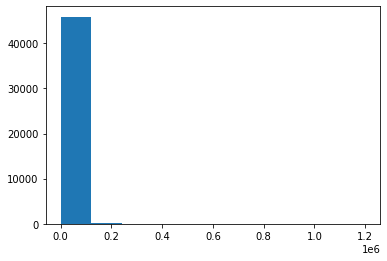

In [14]:
import matplotlib.pyplot as plt
plt.hist(t["price"])
plt.show()

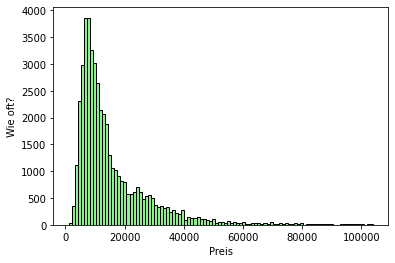

In [15]:
import matplotlib.pyplot as plt
plt.hist(t.query("price<105000")["price"], bins=100, edgecolor="black", color="lightgreen")
plt.xlabel("Preis")
plt.ylabel("Wie oft?")
plt.show()

## Kategoriale Spalten

In [16]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


In [17]:
t["make"].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Lexus',
       'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa', 'Subaru', 'Dodge',
       'Microcar', 'Lamborghini', 'Lada', 'Tesla', 'Chrysler', 'McLaren',
       'Aston', 'Rolls-Royce', 'Lancia', 'Abarth', 'DS', 'Daihatsu',
       'Ligier', 'Ferrari', 'Aixam', 'Zhidou', 'Morgan', 'Maybach', 'RAM',
       'Alpina', 'Polestar', 'Brilliance', 'Piaggio', 'FISKER', 'Others',
       'Cadillac', 'Iveco', 'Isuzu', 'Corvette', 'Baic', 'DFSK',
       'Estrima', 'Alpine'], dtype=object)

In [18]:
t["make"].nunique()

71

In [19]:
t["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [20]:
t["fuel"].value_counts()

Gasoline             28720
Diesel               15178
Electric/Gasoline     1146
Electric               661
LPG                    125
CNG                    116
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

## Erste Hypothesen testen

In [21]:
t["price"]

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

In [22]:
t["hp"]

0       116.00000
1       122.00000
2       160.00000
3       110.00000
4       156.00000
           ...   
46400    71.00000
46401    71.00000
46402    71.00000
46403    71.00000
46404    71.00000
Name: hp, Length: 46071, dtype: float64

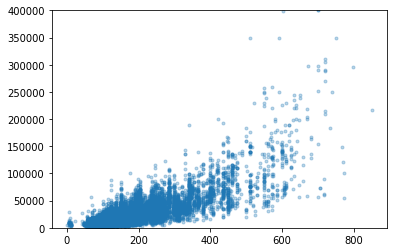

In [23]:
plt.scatter( t["hp"], t["price"], marker=".", alpha=0.3 )
plt.ylim(0,400000)
plt.show()

## Korrelationsmatrix

In [24]:
t.corr()

,mileage,price,hp,year
mileage,1.00000,-0.30355,-0.01490,-0.67805
price,-0.30355,1.00000,0.74672,0.40570
hp,-0.01490,0.74672,1.00000,0.16690
year,-0.67805,0.40570,0.16690,1.00000


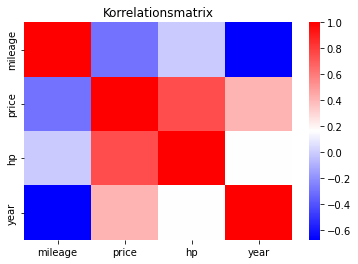

In [25]:
import seaborn as sns
M = t.corr()
sns.heatmap(M,
            cmap="bwr",
            xticklabels=M.columns.values,
            yticklabels=M.columns.values)
plt.title("Korrelationsmatrix")
plt.show()

Zur Auswahl von Colormaps:

https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

# Daten fürs ML aufbereiten

In [26]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


## Aufspaltung in Input- und Outputdaten

In [27]:
# versuche es mit 1,2 oder 3 numerischen Merkmalen
#x = t[ ["mileage"] ]
#x = t[ ["mileage", "year"] ]
x = t[ ["mileage", "year", "hp"] ]
y = t["price"]

In [28]:
x

,mileage,year,hp
0,235000,2011,116.00000
1,92800,2011,122.00000
2,149300,2011,160.00000
3,96200,2011,110.00000
4,156000,2011,156.00000
...,...,...,...
46400,99,2021,71.00000
46401,99,2021,71.00000
46402,99,2021,71.00000
46403,99,2021,71.00000


In [29]:
y

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

## Aufspaltung in Trainings- und Testdaten

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [31]:
x_train.shape

(36856, 3)

In [32]:
y_train.shape

(36856,)

In [33]:
x_test.shape

(9215, 3)

In [34]:
y_test.shape

(9215,)

In [35]:
x_train

,mileage,year,hp
26009,93000,2011,60.00000
4718,49100,2014,95.00000
2533,113000,2012,174.00000
41360,46004,2017,184.00000
22549,42961,2017,116.00000
...,...,...,...
21369,68000,2012,122.00000
46222,9900,2021,245.00000
42900,88500,2018,150.00000
43867,10691,2019,190.00000


# Machine Learning mittels `scikit-learn`

## Modell erlernen

In [36]:
#from sklearn.neighbors import KNeighborsRegressor
#model = KNeighborsRegressor(n_neighbors=5)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

## Modell testen

In [37]:
pred = model.predict(x_test)

In [38]:
pred[:20]

array([10990.        ,  6599.        , 19450.        , 23750.        ,
       19990.        ,  9680.        , 17290.        , 10250.        ,
       11985.        , 17930.        ,  8375.        , 50880.        ,
        5102.5       , 61916.66666667,  7945.        ,  8000.        ,
        4974.5       ,  5999.        ,  4790.        , 10790.        ])

In [39]:
y_test[:20]

11100    10590
3364      7900
23166    18450
18826    26650
41493    17860
32970    12110
22565    15950
41458    11990
11858    12900
31233    12490
28983     6800
44623    48900
29840     3999
31312    41990
24599     6350
38161     6800
28168     5000
12266     5950
35053     4999
15746    10999
Name: price, dtype: int64

In [40]:
import numpy
mittlerer_fehler = numpy.mean(abs(pred - y_test))
mittlerer_fehler

3718.412782615336

# Alle Daten fürs ML verwenden

## Numerische Kodierung kategorialer Spalten

In [41]:
d = {"Name" : ["Bart", "Lisa", "Homer"],
     "Lieblingsfarbe" : ["Rot", "Grün", "Blau"]}
d

{'Name': ['Bart', 'Lisa', 'Homer'], 'Lieblingsfarbe': ['Rot', 'Grün', 'Blau']}

In [42]:
t2 = pandas.DataFrame(d)
t2

,Name,Lieblingsfarbe
0,Bart,Rot
1,Lisa,Grün
2,Homer,Blau


In [43]:
pandas.get_dummies(t2)

,Name_Bart,Name_Homer,Name_Lisa,Lieblingsfarbe_Blau,Lieblingsfarbe_Grün,Lieblingsfarbe_Rot
0,1,0,0,0,0,1
1,0,0,1,0,1,0
2,0,1,0,1,0,0


In [44]:
t2 = pandas.get_dummies(t)
t2

,mileage,price,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6800,116.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,92800,6877,122.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,6900,160.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,6950,110.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,6950,156.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46401,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46402,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46403,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Aufspaltung in Input- und Outputdaten

In [45]:
x = t2.drop("price", axis=1)
y = t2["price"]

In [46]:
x

,mileage,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,116.00000,2011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,92800,122.00000,2011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,160.00000,2011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,110.00000,2011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,156.00000,2011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,71.00000,2021,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46401,99,71.00000,2021,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46402,99,71.00000,2021,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46403,99,71.00000,2021,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
y

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

## Aufspaltung in Trainings- und Testdaten

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [49]:
x_train.shape

(36856, 928)

In [50]:
y_train.shape

(36856,)

In [51]:
x_test.shape

(9215, 928)

In [52]:
y_test.shape

(9215,)

## Machine Learning

In [53]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

## Modellgüte bestimmen

In [54]:
pred = model.predict(x_test)

In [55]:
pred[:20]

array([10990.        ,  8490.        , 19990.        , 23990.        ,
       18960.        , 11680.        , 16480.        ,  9190.        ,
       13830.        , 12990.        ,  8375.        , 45890.        ,
        4490.        , 40499.        ,  6990.        ,  4990.        ,
        5499.66666667,  5240.        ,  5400.        , 10790.        ])

In [56]:
y_test[:20]

11100    10590
3364      7900
23166    18450
18826    26650
41493    17860
32970    12110
22565    15950
41458    11990
11858    12900
31233    12490
28983     6800
44623    48900
29840     3999
31312    41990
24599     6350
38161     6800
28168     5000
12266     5950
35053     4999
15746    10999
Name: price, dtype: int64

In [57]:
import numpy
mittlerer_fehler = numpy.mean(abs(pred - y_test))
mittlerer_fehler

2425.8855644655428

# Machine Learning mittels `TensorFlow`

## Einführung Skalierung

In [58]:
d = {"A": [-20, -20, 0, 20], "B": [-5, 0, 5, 5]}
d

{'A': [-20, -20, 0, 20], 'B': [-5, 0, 5, 5]}

In [59]:
t2 = pandas.DataFrame(d)
t2

,A,B
0,-20,-5
1,-20,0
2,0,5
3,20,5


In [60]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()

In [61]:
s.fit_transform(t2)

array([[0. , 0. ],
       [0. , 0.5],
       [0.5, 1. ],
       [1. , 1. ]])

## Beispieldaten skalieren

In [62]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


In [63]:
t2 = pandas.get_dummies(t)
t2

,mileage,price,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6800,116.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,92800,6877,122.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,6900,160.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,6950,110.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,6950,156.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46401,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46402,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46403,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [64]:
x = t2.drop("price", axis=1)
y = t2["price"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [65]:
s_input = MinMaxScaler()
s_output = MinMaxScaler()

In [66]:
x_train_scaled = s_input.fit_transform( x_train )
x_test_scaled = s_input.transform( x_test )

In [67]:
y_train_scaled = s_output.fit_transform( y_train.values.reshape(-1,1) )
y_test_scaled = s_output.transform( y_test.values.reshape(-1,1) )

In [68]:
x_train[:5]

,mileage,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
26009,93000,60.00000,2011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4718,49100,95.00000,2014,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2533,113000,174.00000,2012,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
41360,46004,184.00000,2017,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
22549,42961,116.00000,2017,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [69]:
x_train_scaled[:5]

array([[0.08370001, 0.06508876, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.04419   , 0.10650888, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.10170001, 0.2       , 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.0414036 , 0.21183432, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.0386649 , 0.13136095, 0.6       , ..., 0.        , 0.        ,
        1.        ]])

In [70]:
y_train[:5]

26009     2950
4718      9000
2533      9200
41360    30700
22549    14791
Name: price, dtype: int64

In [71]:
y_train_scaled[:5]

array([[0.00141826],
       [0.00646561],
       [0.00663246],
       [0.02456931],
       [0.01129688]])

## Neuronales Netz erstellen und trainieren

In [72]:
import tensorflow as tf
tf.__version__

2022-06-22 15:17:40.903937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 15:17:40.903953: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

In [73]:
nr_inputs = x_train_scaled.shape[1]
nr_inputs

928

In [74]:
nr_outputs = 1
nr_outputs

1

In [75]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(80,
                             activation="relu",
                             input_shape=(nr_inputs,),
                             name="HiddenLayer1"))
model.add(keras.layers.Dense(nr_outputs,                             
                             activation="linear",
                             name="OutputLayer"))


model.compile(optimizer='adam',
              loss=keras.losses.MeanSquaredError())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 80)                74320     
                                                                 
 OutputLayer (Dense)         (None, 1)                 81        
                                                                 
Total params: 74,401
Trainable params: 74,401
Non-trainable params: 0
_________________________________________________________________


2022-06-22 15:17:41.936118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 15:17:41.936773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 15:17:41.936824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-22 15:17:41.936871: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-22 15:17:41.936920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [76]:
history = model.fit(x_train_scaled,
                    y_train_scaled,
                    validation_split=0.1,
                    epochs=50)

Epoch 1/50
1037/1037 [==============================] - 1s 1ms/step - loss: 2.8542e-04 - val_loss: 9.3204e-05
Epoch 2/50
1037/1037 [==============================] - 1s 963us/step - loss: 7.0415e-05 - val_loss: 5.1751e-05
Epoch 3/50
1037/1037 [==============================] - 1s 949us/step - loss: 4.8672e-05 - val_loss: 3.8904e-05
Epoch 4/50
1037/1037 [==============================] - 1s 927us/step - loss: 4.1863e-05 - val_loss: 3.2342e-05
Epoch 5/50
1037/1037 [==============================] - 1s 965us/step - loss: 3.5091e-05 - val_loss: 2.6588e-05
Epoch 6/50
1037/1037 [==============================] - 1s 978us/step - loss: 2.9527e-05 - val_loss: 2.3380e-05
Epoch 7/50
1037/1037 [==============================] - 1s 949us/step - loss: 2.4026e-05 - val_loss: 2.1329e-05
Epoch 8/50
1037/1037 [==============================] - 1s 961us/step - loss: 2.1363e-05 - val_loss: 1.7870e-05
Epoch 9/50
1037/1037 [==============================] - 1s 939us/step - loss: 1.6648e-05 - val_loss: 5.615

In [77]:
history.history["loss"][:10]

[0.00028541850042529404,
 7.041450589895248e-05,
 4.867225652560592e-05,
 4.186339720035903e-05,
 3.509061934892088e-05,
 2.952655813714955e-05,
 2.4026079699979164e-05,
 2.13630646612728e-05,
 1.6648436940158717e-05,
 1.5421763237100095e-05]

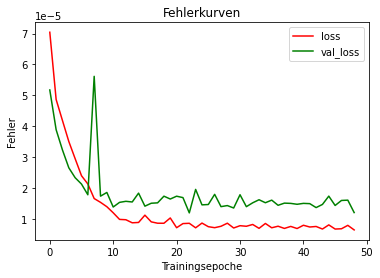

In [78]:
import matplotlib.pyplot as plt
y1 = history.history["loss"][1:]
y2 = history.history["val_loss"][1:]
plt.plot(y1, color="red", label="loss")
plt.plot(y2, color="green", label="val_loss")
plt.xlabel("Trainingsepoche")
plt.ylabel("Fehler")
plt.title("Fehlerkurven")
plt.legend()
plt.show()

In [79]:
preds_scaled = model.predict( x_test_scaled )

In [80]:
preds_scaled[:10]

array([[0.00685668],
       [0.00752781],
       [0.0140929 ],
       [0.02457424],
       [0.01449973],
       [0.0089774 ],
       [0.01070255],
       [0.0073247 ],
       [0.00822834],
       [0.01013051]], dtype=float32)

In [81]:
preds_euro = s_output.inverse_transform( preds_scaled ).flatten()

In [82]:
preds_euro[:10]

array([ 9468.761, 10273.21 , 18142.451, 30705.914, 18630.105, 12010.766,
       14078.615, 10029.75 , 11112.906, 13392.935], dtype=float32)

In [83]:
s_output.inverse_transform( y_test_scaled )[:20]

array([[10590.],
       [ 7900.],
       [18450.],
       [26650.],
       [17860.],
       [12110.],
       [15950.],
       [11990.],
       [12900.],
       [12490.],
       [ 6800.],
       [48900.],
       [ 3999.],
       [41990.],
       [ 6350.],
       [ 6800.],
       [ 5000.],
       [ 5950.],
       [ 4999.],
       [10999.]])

In [84]:
y_test.values[:20]

array([10590,  7900, 18450, 26650, 17860, 12110, 15950, 11990, 12900,
       12490,  6800, 48900,  3999, 41990,  6350,  6800,  5000,  5950,
        4999, 10999])

In [85]:
preds_euro[:20]

array([ 9468.761 , 10273.21  , 18142.451 , 30705.914 , 18630.105 ,
       12010.766 , 14078.615 , 10029.75  , 11112.906 , 13392.935 ,
        5888.911 , 39322.04  ,  5218.455 , 42006.504 ,  7180.4766,
        8289.07  ,  5880.8   ,  5880.8   ,  5880.8   , 10411.104 ],
      dtype=float32)

In [86]:
preds_euro - y_test.values

array([-1121.23925781,  2373.20996094,  -307.54882812, ...,
        1185.86914062, -1011.15136719, -6187.03320312])

In [87]:
abs(preds_euro - y_test.values)

array([1121.23925781, 2373.20996094,  307.54882812, ..., 1185.86914062,
       1011.15136719, 6187.03320312])

In [88]:
numpy.mean(abs(preds_euro - y_test.values))

1929.858617241746

In [89]:
mittlerer_fehler = numpy.mean(abs(preds_euro - y_test.values))
mittlerer_fehler

1929.858617241746